In [1]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.kymo_class import *
from scipy.signal import find_peaks
import os
from pathlib import Path
import pandas as pd
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
from glob import glob
from tqdm import tqdm
from tifffile import imwrite

%matplotlib widget
%load_ext autoreload
%autoreload 2

c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
path = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoCut\Kymo_4x\002.tif"

In [3]:
img_address = path
out_address = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoCut\Kymo_4x\output"

space_resolution = 1.725/2
# space_resolution = 1

fps = 15
display_kymos = False

address_list = [Path(address) for address in glob(img_address)]
kymo_stack = [imageio.imread(address) for address in address_list]
kymo_edge_list = [
    KymoEdgeAnalysis(kymo=kymo, edge_name=address_list[i].stem, address=out_address)
    for i, kymo in enumerate(kymo_stack)
]

for i, kymo_anal in enumerate(tqdm(kymo_edge_list)):
    title = address_list[i].name.split(".")[-2]
    imshow_extent = [
        0,
        space_resolution * kymo_anal.kymo.shape[1],
        1 / fps * kymo_anal.kymo.shape[0],
        0,
    ]
    kymo_anal.space_pixel_size = space_resolution
    kymo_anal.time_pixel_size = 1 / fps
    forw_thresh, back_thresh = kymo_anal.fourier_kymo(1)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.78s/it]


In [4]:
kymo_stack[0].shape[1]*space_resolution

1551.6375

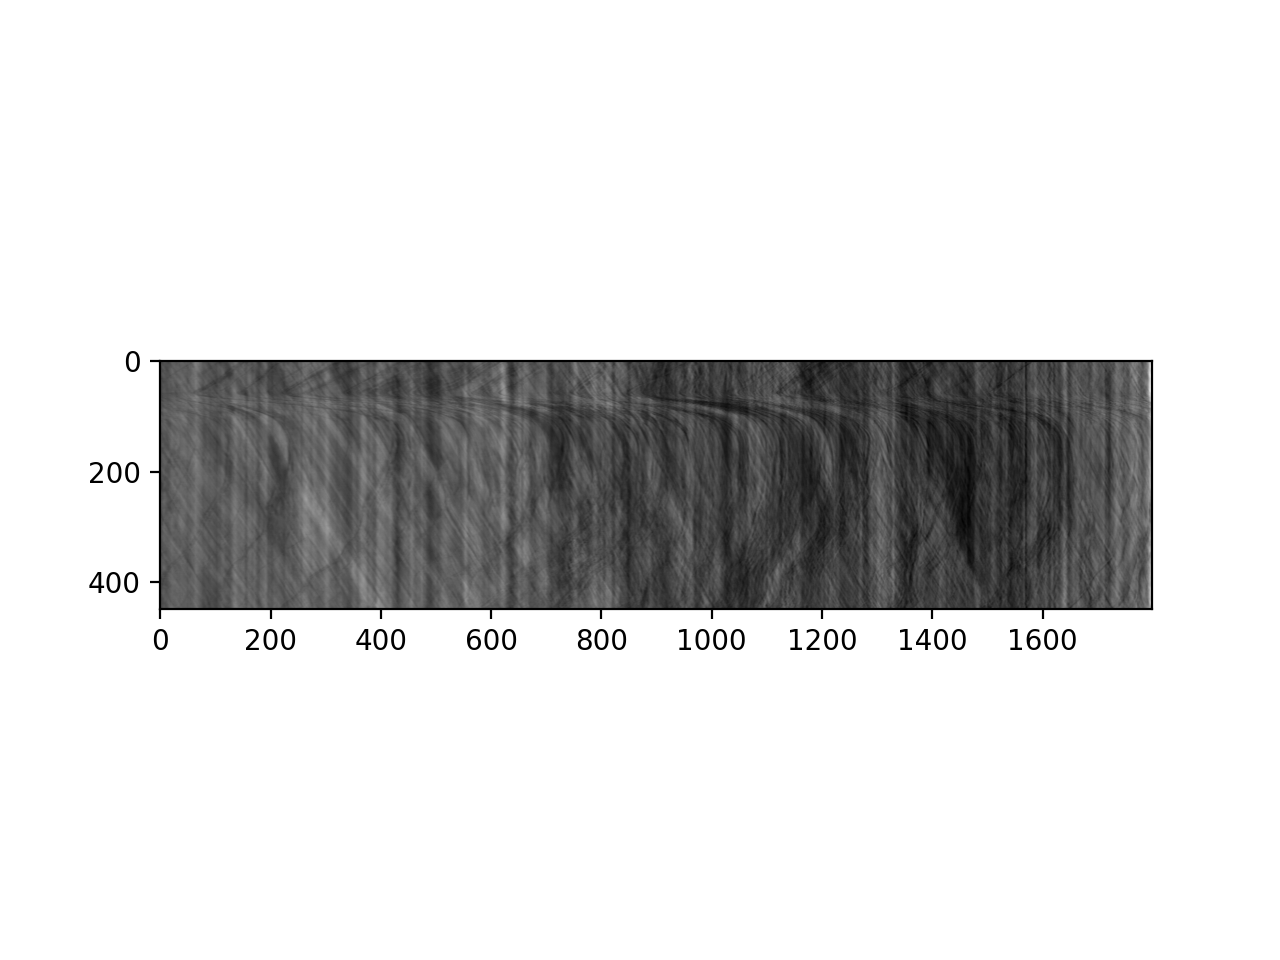

In [5]:
fig,ax =plt.subplots()
ax.imshow(kymo_stack[0],cmap="gray")
# plt.savefig(os.path.join(path_figure,'incompressibilit_kymo.pdf'), transparent=True, bbox_inches='tight',dpi = 600)# ax.imshow(forw_thresh[0]+back_thresh[0],cmap="gray")

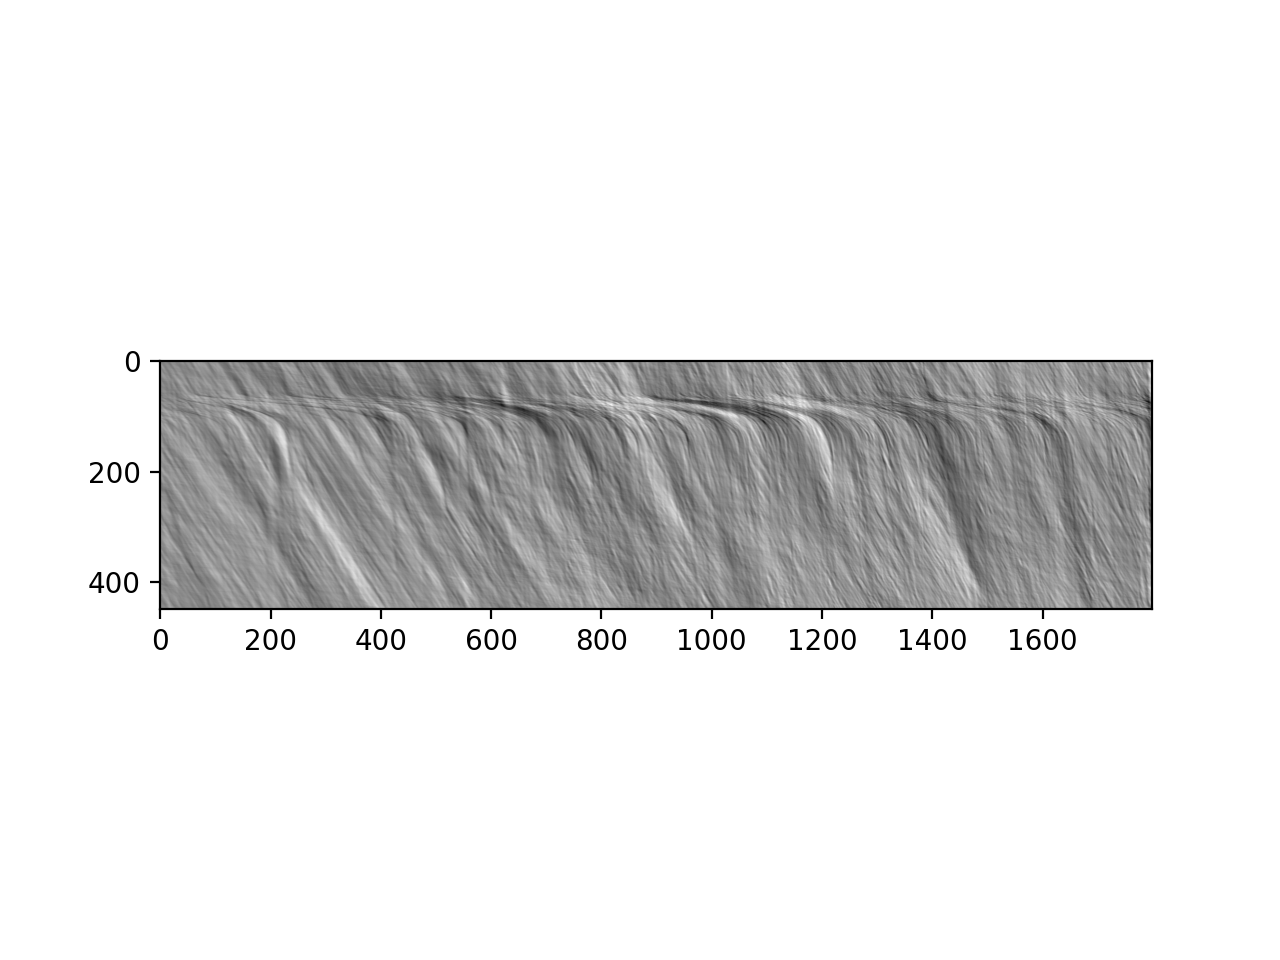

In [6]:
fig,ax =plt.subplots()
ax.imshow(forw_thresh[0],cmap="gray")
# ax.imshow(forw_thresh[0]+back_thresh[0],cmap="gray")

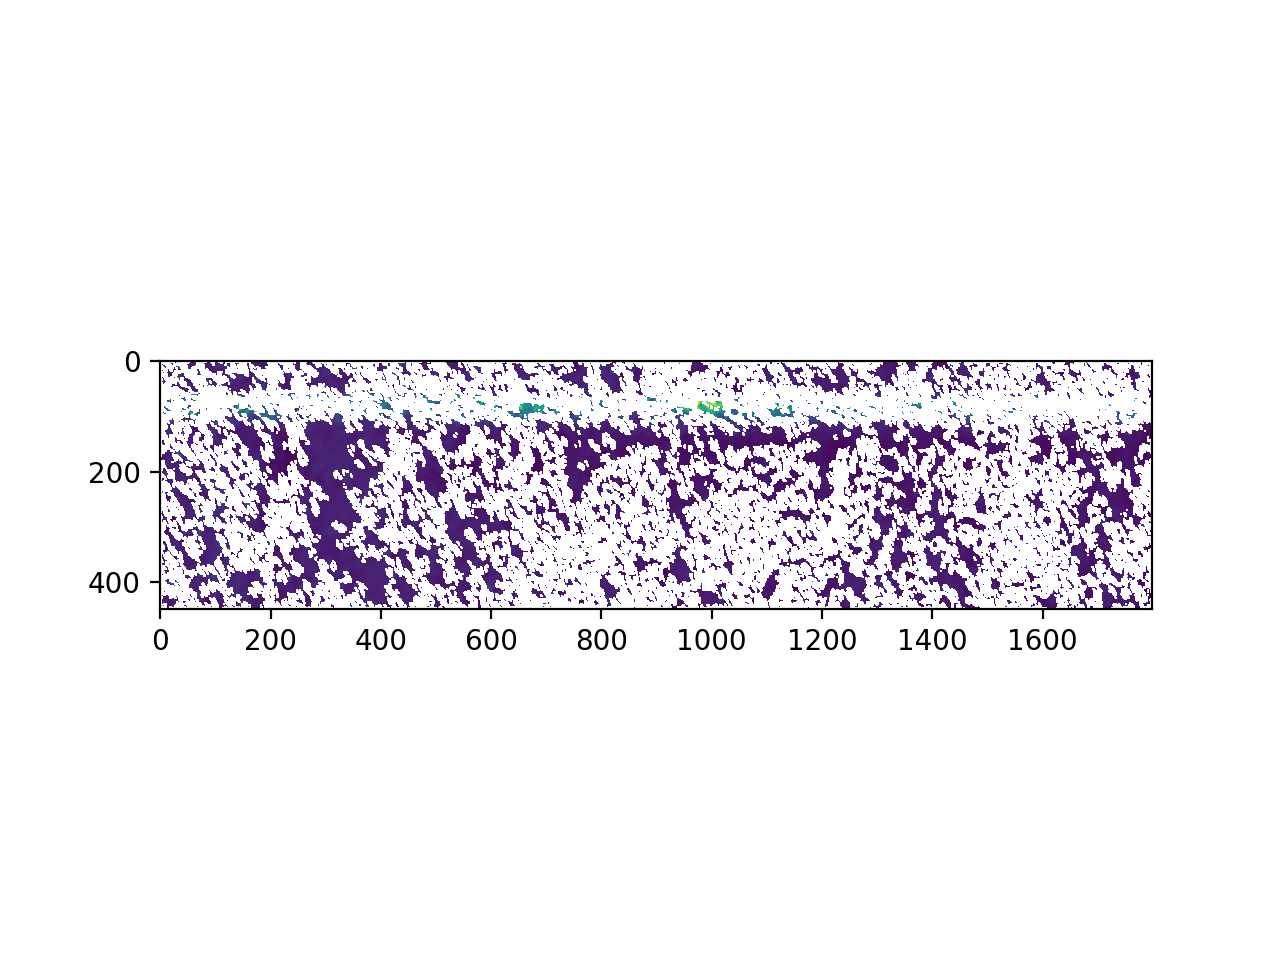

In [7]:
speeds,time = kymo_edge_list[0].extract_speeds(11)
fig,ax =plt.subplots()
ax.imshow(speeds[0][1])

In [8]:
import pandas as pd
import numpy as np

def average_speed_region(speed_matrix, region_width=200):
    n_regions = speed_matrix.shape[1] // region_width
    data = []

    for i in range(n_regions):
        start_idx = i * region_width
        end_idx = start_idx + region_width
        region_avg_speed = np.nanmean(speed_matrix[:, start_idx:end_idx], axis=1)
        for t, speed in enumerate(region_avg_speed):
            data.append({'Time': t/fps, 'Average Speed': speed, 'Region': start_idx})
    
    return pd.DataFrame(data)

# Assuming 'speeds' is defined and 'speed_matrix' has the right dimensions
speed_matrix = speeds[0][1][10:-10, :]  # Adjust as per your actual data setup
df = average_speed_region(speed_matrix,300)


2024-05-18 22:53:34,933-[INFO]- fontTools.subset:2815 -> maxp pruned
2024-05-18 22:53:34,953-[INFO]- fontTools.subset:2815 -> cmap pruned
2024-05-18 22:53:34,960-[INFO]- fontTools.subset:2799 -> kern dropped
2024-05-18 22:53:34,961-[INFO]- fontTools.subset:2815 -> post pruned
2024-05-18 22:53:34,963-[INFO]- fontTools.subset:2799 -> FFTM dropped
2024-05-18 22:53:34,968-[INFO]- fontTools.subset:2815 -> GPOS pruned
2024-05-18 22:53:34,979-[INFO]- fontTools.subset:2815 -> GSUB pruned
2024-05-18 22:53:34,981-[INFO]- fontTools.subset:2815 -> name pruned
2024-05-18 22:53:34,995-[INFO]- fontTools.subset:2815 -> glyf pruned
2024-05-18 22:53:34,997-[INFO]- fontTools.subset:2855 -> Added gid0 to subset
2024-05-18 22:53:34,998-[INFO]- fontTools.subset:2863 -> Added first four glyphs to subset
2024-05-18 22:53:34,999-[INFO]- fontTools.subset:2867 -> Closing glyph list over 'GSUB': 7 glyphs before
2024-05-18 22:53:35,000-[INFO]- fontTools.subset:446 -> Glyph names: ['.notdef', '.null', 'm', 'nonmark

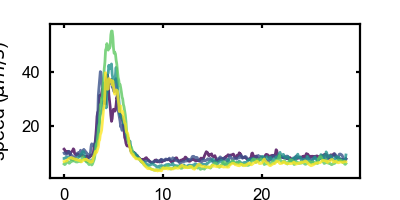

In [9]:
import seaborn as sns
plt.style.use('presentation.mplstyle')
path_figure = r'C:\\Users\\coren\\AMOLF-SHIMIZU Dropbox\\HFSP_symbiotic-networks\\Article_TravellingWave\\Supplementary material\\extended_data_figures'

fig,ax =plt.subplots(figsize = (2.,1))
select = df[df['Region']>=0]
lineplot = sns.lineplot(data=select, x='Time', y='Average Speed', hue='Region', palette='viridis',alpha = 0.8)
lineplot.legend_.remove()  # This removes the legend from the plot
ax.set_xlabel("time (s)")
ax.set_ylabel("speed ($\mu m/s$)")
# norm = mpl.colors.Normalize(vmin=0, vmax=1200*1.725/2)
# sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
# colorbar = plt.colorbar(sm,ax=ax)
# colorbar.set_label('distance ($\mu m$)')
plt.savefig(os.path.join(path_figure,'incompressibility.pdf'), transparent=True, bbox_inches='tight')

In [10]:

# Assuming 'speeds' is defined and 'speed_matrix' has the right dimensions
speed_matrix = speeds[0][1][10:-10, :]  # Adjust as per your actual data setup
df = average_speed_region(speed_matrix,200)

In [11]:
1400*1.725/2

1207.5

In [12]:
from scipy.signal import correlate
signal1 = df[df['Region']==1400].sort_values(by = 'Time')["Average Speed"]


2024-05-18 22:53:37,547-[INFO]- fontTools.subset:2815 -> maxp pruned
2024-05-18 22:53:37,548-[INFO]- fontTools.subset:2799 -> LTSH dropped
2024-05-18 22:53:37,549-[INFO]- fontTools.subset:2815 -> cmap pruned
2024-05-18 22:53:37,550-[INFO]- fontTools.subset:2799 -> kern dropped
2024-05-18 22:53:37,551-[INFO]- fontTools.subset:2815 -> post pruned
2024-05-18 22:53:37,552-[INFO]- fontTools.subset:2799 -> PCLT dropped
2024-05-18 22:53:37,592-[INFO]- fontTools.subset:2815 -> GPOS pruned
2024-05-18 22:53:37,618-[INFO]- fontTools.subset:2815 -> GSUB pruned
2024-05-18 22:53:37,619-[INFO]- fontTools.subset:2799 -> JSTF dropped
2024-05-18 22:53:37,620-[INFO]- fontTools.subset:2799 -> DSIG dropped
2024-05-18 22:53:37,621-[INFO]- fontTools.subset:2815 -> name pruned
2024-05-18 22:53:37,651-[INFO]- fontTools.subset:2815 -> glyf pruned
2024-05-18 22:53:37,658-[INFO]- fontTools.subset:2855 -> Added gid0 to subset
2024-05-18 22:53:37,659-[INFO]- fontTools.subset:2863 -> Added first four glyphs to subse

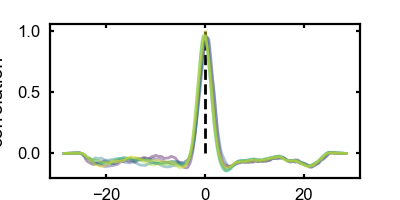

In [13]:
fig, ax = plt.subplots(figsize=(2, 1))
ax.vlines(0,0,1,color="black",linestyle = "dashed")

regions = df['Region'].unique()
cmap = plt.cm.viridis  # Use the viridis colormap
colors = cmap(np.linspace(0, 1, len(regions)))
idxmaxs = []
dists = []
for idx, value in enumerate(regions):
    # Filter data for the current region and sort by Time
    signal2 = df[df['Region'] == value].sort_values(by='Time')["Average Speed"]
    
    # Normalization function
    normalize = lambda signal: (signal - np.mean(signal)) / np.std(signal)
    
    # Calculate the correlation
    corr = correlate(normalize(signal1), normalize(signal2), method='auto') / len(signal1)
    lag = np.arange(-len(signal1) + 1, len(signal1))/fps
    
    # Plot each correlation with a color from the colormap
    ax.plot(lag, corr, color=colors[idx],alpha = 0.4)
    idxmaxs.append(lag[np.argmax(corr)])
    dists.append(np.abs(value-1600))
    
ax.set_xlabel("delay (s)")
ax.set_ylabel("correlation")
plt.savefig(os.path.join(path_figure,'incompressibility_crosscor.pdf'), transparent=True, bbox_inches='tight')

2024-05-18 22:55:23,021-[INFO]- fontTools.subset:2815 -> maxp pruned
2024-05-18 22:55:23,042-[INFO]- fontTools.subset:2815 -> cmap pruned
2024-05-18 22:55:23,043-[INFO]- fontTools.subset:2799 -> kern dropped
2024-05-18 22:55:23,044-[INFO]- fontTools.subset:2815 -> post pruned
2024-05-18 22:55:23,044-[INFO]- fontTools.subset:2799 -> FFTM dropped
2024-05-18 22:55:23,048-[INFO]- fontTools.subset:2815 -> GPOS pruned
2024-05-18 22:55:23,249-[INFO]- fontTools.subset:2815 -> GSUB pruned
2024-05-18 22:55:23,251-[INFO]- fontTools.subset:2815 -> name pruned
2024-05-18 22:55:23,265-[INFO]- fontTools.subset:2815 -> glyf pruned
2024-05-18 22:55:23,268-[INFO]- fontTools.subset:2855 -> Added gid0 to subset
2024-05-18 22:55:23,270-[INFO]- fontTools.subset:2863 -> Added first four glyphs to subset
2024-05-18 22:55:23,271-[INFO]- fontTools.subset:2867 -> Closing glyph list over 'GSUB': 7 glyphs before
2024-05-18 22:55:23,272-[INFO]- fontTools.subset:446 -> Glyph names: ['.notdef', '.null', 'm', 'nonmark

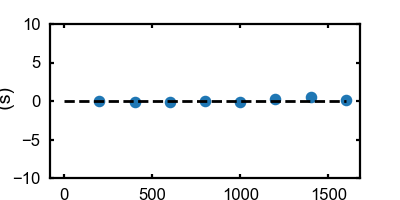

In [17]:
fig, ax = plt.subplots(figsize=(2, 1))
ax.hlines(0,0,np.max(dists),color="black",linestyle = "dashed")

x = np.array(idxmaxs)*1.725/2
ax.scatter(dists,x,s=10)
ax.set_ylabel("$\Delta t$ \n (s)", labelpad=-1)
ax.set_xlabel("distance \n ($\mu m$)", labelpad=-0.80)
ax.set_ylim(-10,10)
plt.savefig(os.path.join(path_figure,'incompressibility_delay.pdf'), transparent=True, bbox_inches='tight')

In [15]:
import seaborn as sns

plt.style.use('presentation.mplstyle')
path_figure = r'C:\\Users\\coren\\AMOLF-SHIMIZU Dropbox\\HFSP_symbiotic-networks\\Article_TravellingWave\\Supplementary material\\extended_data_figures'

# fig,ax =plt.subplots(figsize = (2,1))
select = df[df['Region']>=0]
df['Region'].unique()

array([   0,  200,  400,  600,  800, 1000, 1200, 1400], dtype=int64)